# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve

In [ ]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


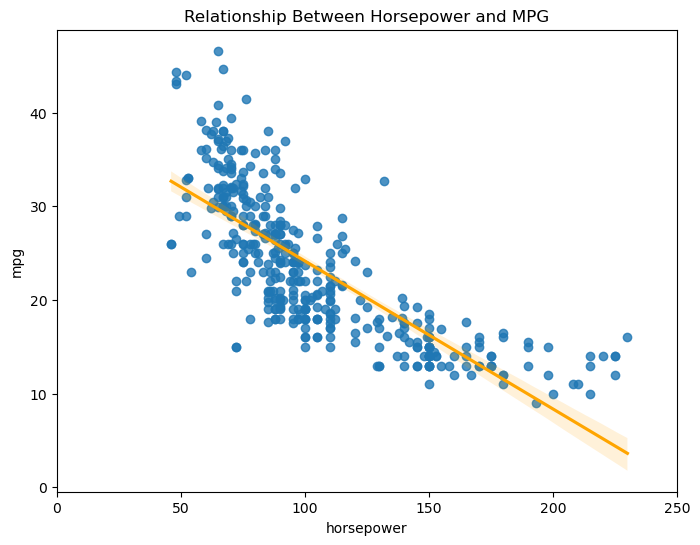

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us? RSS = SSE

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [ ]:
# call_on_students(1)

#### Answer: 

- graph of the cost function
- predicted values minus actual (squared)
- slope with the minimum error (-.157)


### 2) Imagine that you're starting at a slope towards the top upper left corner. Describe how gradient descent would work.

In [ ]:
# call_on_students(1)

#### Answer: 

- start with a guess of the slope
- calculate the gradient (derivative)
- take a step down and make a new guess. Step size is proportional to the gradient
- learning rate = the constant of proportionality, how much gradient do we take in the step down
- Repeat this until we find the minimum of the cost function

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
# call_on_students(1)

#### Answer: 

- How much do we update our guess by?
- 


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [ ]:
# call_on_students(1)

#### Answer: 

- Categorical or classification
- predict the probability of the positive class
- logistic regression takes a linear formula and transforms it via the expit and logit
- harder to directly interpret coefs
- is parametric


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [ ]:
# call_on_students(1)

#### Answer: 

- can predict classes unlike linear regression
- less prone to overfitting because it includes regularization by default
- need to scale or normalize data for logistic regression but not for decision tree
- logistic more sensitive to outliers because it is linear/distance based
- decision trees are highly sensitive to class imbalance, logisitc less so


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [5]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [6]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [ ]:
# call_on_students(1)

In [7]:
# Train-test split
# Set test_size=0.33 and random_state=42
y = mpg_class['target']
X = mpg_class.drop(columns='target')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [ ]:
# Code to explore


#### Answer:

- 


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- 


#### Part 3: How accurate would that baseline be on test data?


In [ ]:
# Code to find the answer


#### Answer:

- 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- 


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our train and test set

In [ ]:
# call_on_students(1)

In [ ]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = None

In [ ]:
# Plot a confusion matrix on the train data


In [ ]:
# Plot a confusion matrix on the test data


### 10) Calculate the accuracy, precision, recall and f1-score for the train and test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [ ]:
# Accuracy


In [ ]:
# Precision


In [ ]:
# Recall


In [ ]:
# F1-Score


### 11) Calculate the ROC-AUC on the train and test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [ ]:
# Calculate roc-auc


In [ ]:
# Plot the ROC curve


### 12) Evaluate! Based on the metrics of our train and test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- 


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [9]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

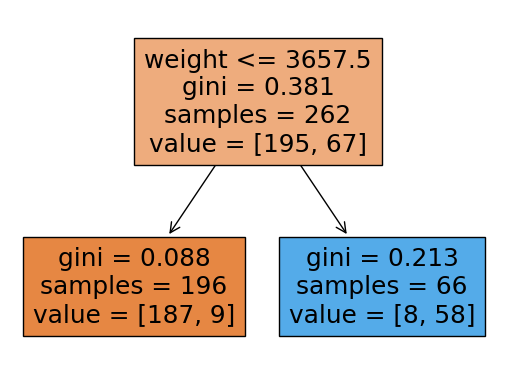

In [10]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

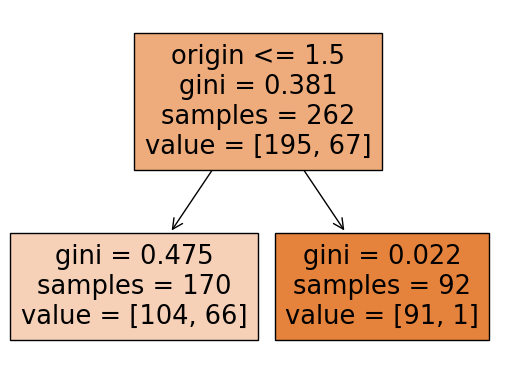

In [11]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- 


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our train and test set

In [ ]:
# call_on_students(1)

In [12]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
from sklearn.metrics import confusion_matrix

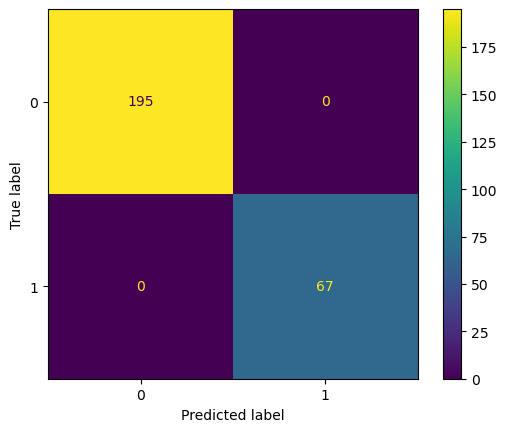

In [15]:
# Plot a confusion matrix on the train data
cm = confusion_matrix(y_train, dt.predict(X_train))
ConfusionMatrixDisplay(cm).plot();

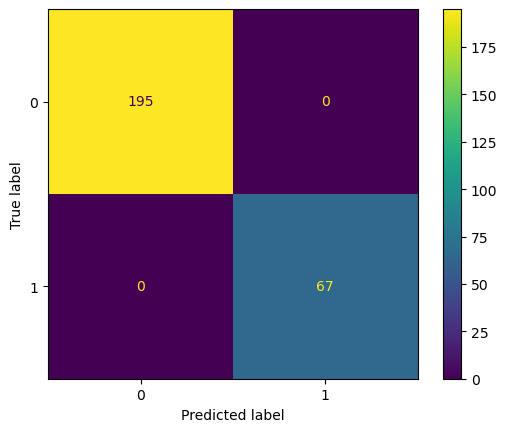

In [16]:
# Plot a confusion matrix on the test data
cm_test = confusion_matrix(y_train, dt.predict(X_train))
ConfusionMatrixDisplay(cm_test).plot();

In [20]:
from sklearn.metrics import

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

NameError: name 'plot_roc_curve' is not defined

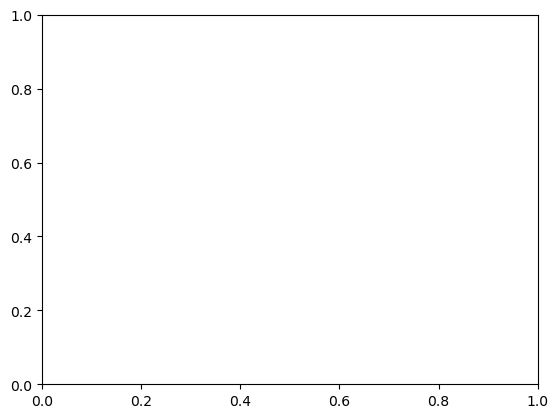

In [19]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

In [ ]:
dt_pred_probs = dt.predict_proba(X_test_scaled)[:,1]
log_pred_probs = logreg.predict_proba(X_test_scaled)[:,1]

fpr1, tpr1, thresh1 = roc_curve(y_test, dt_pred_probs)
fpr2, tpr2, thresh2 = roc_curve(y_test, log_pred_probs)
fig, ax = plt.subplots()
RocCurveDisplay(fpr1, tpr1, roc_auc=roc_auc_score(y_test, dt_pred_probs), 
                estimator_name='dt').plot(ax=ax)
RocCurveDisplay(fpr2, tpr2, roc_auc=roc_auc_score(y_test, log_pred_probs),
                estimator_name='logreg').plot(ax=ax)

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- 
